# Plot of flies moving in arena

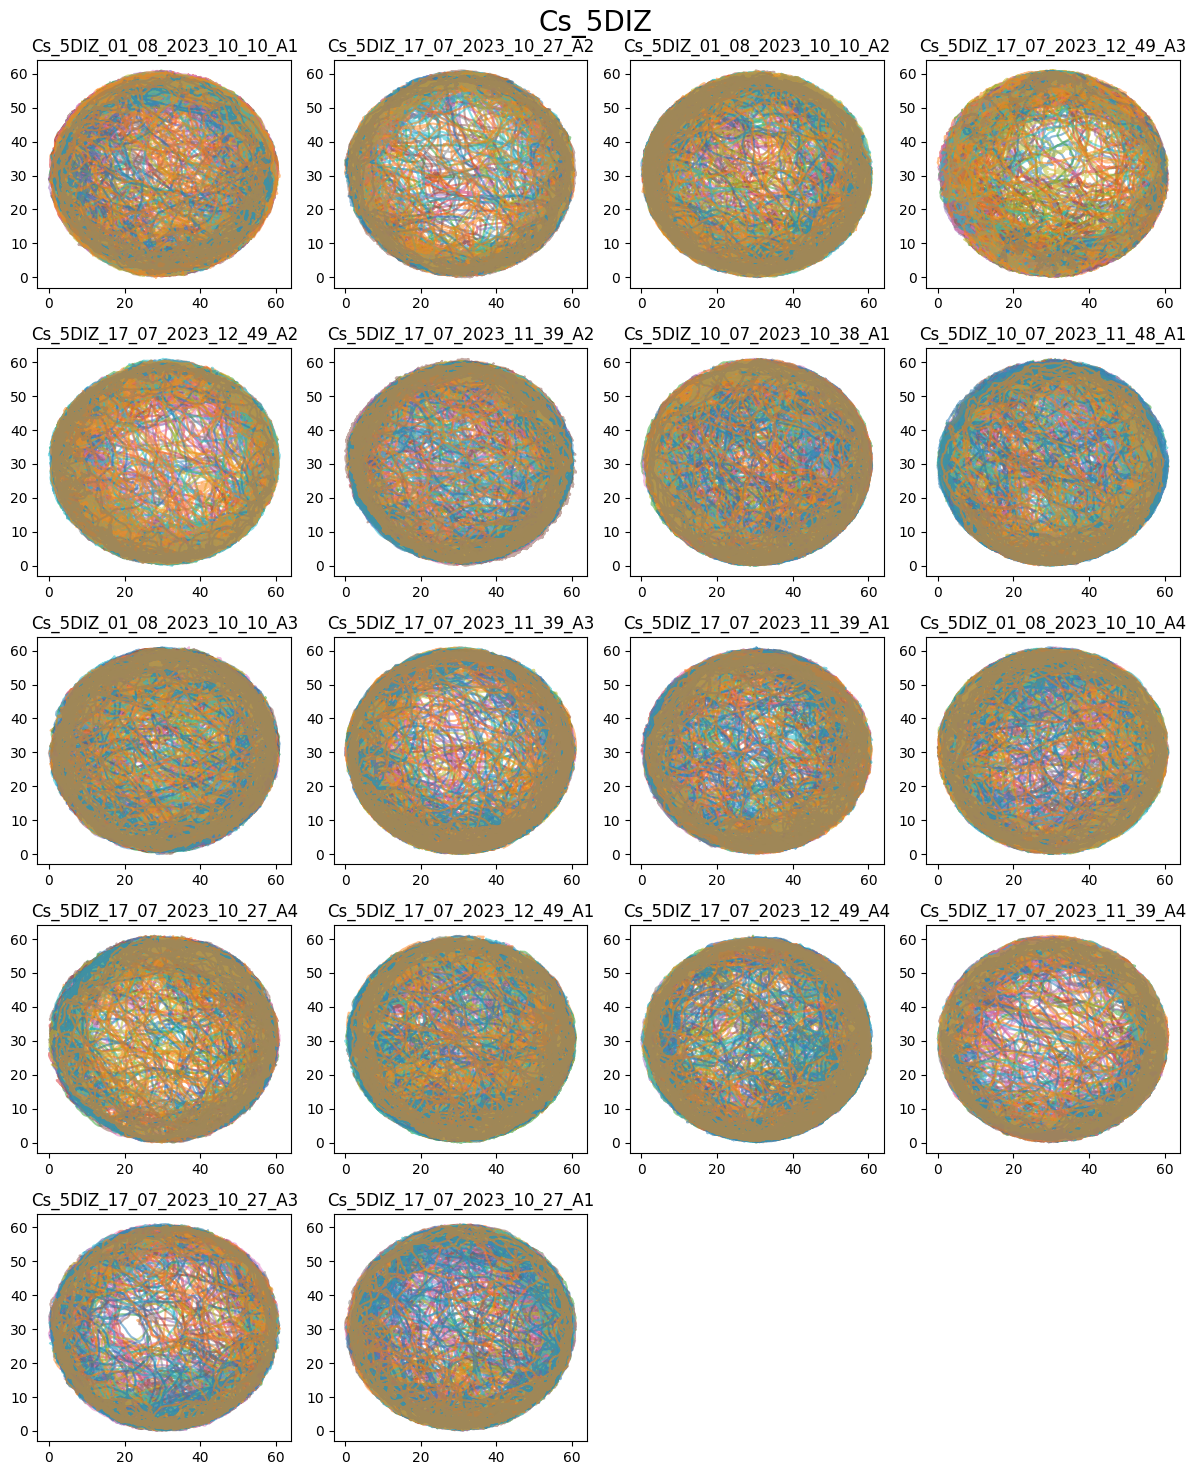

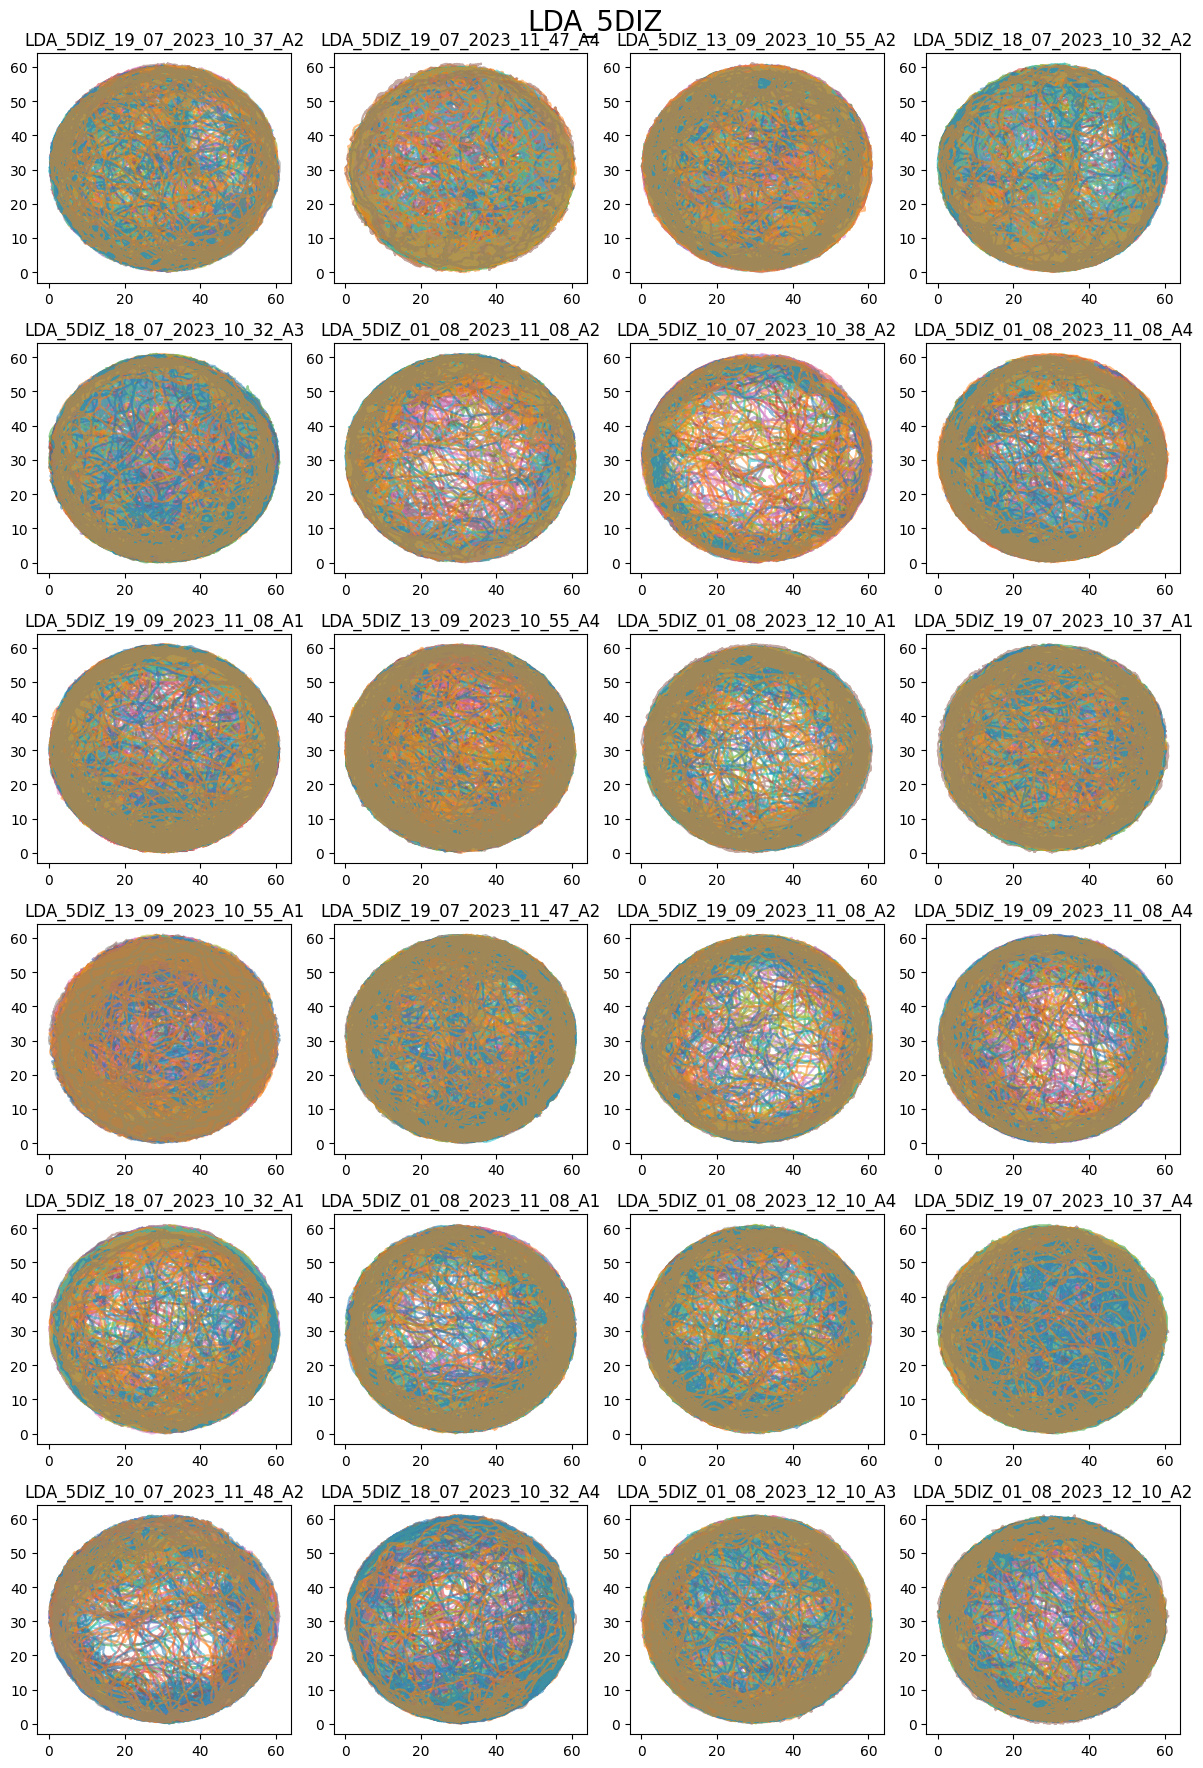

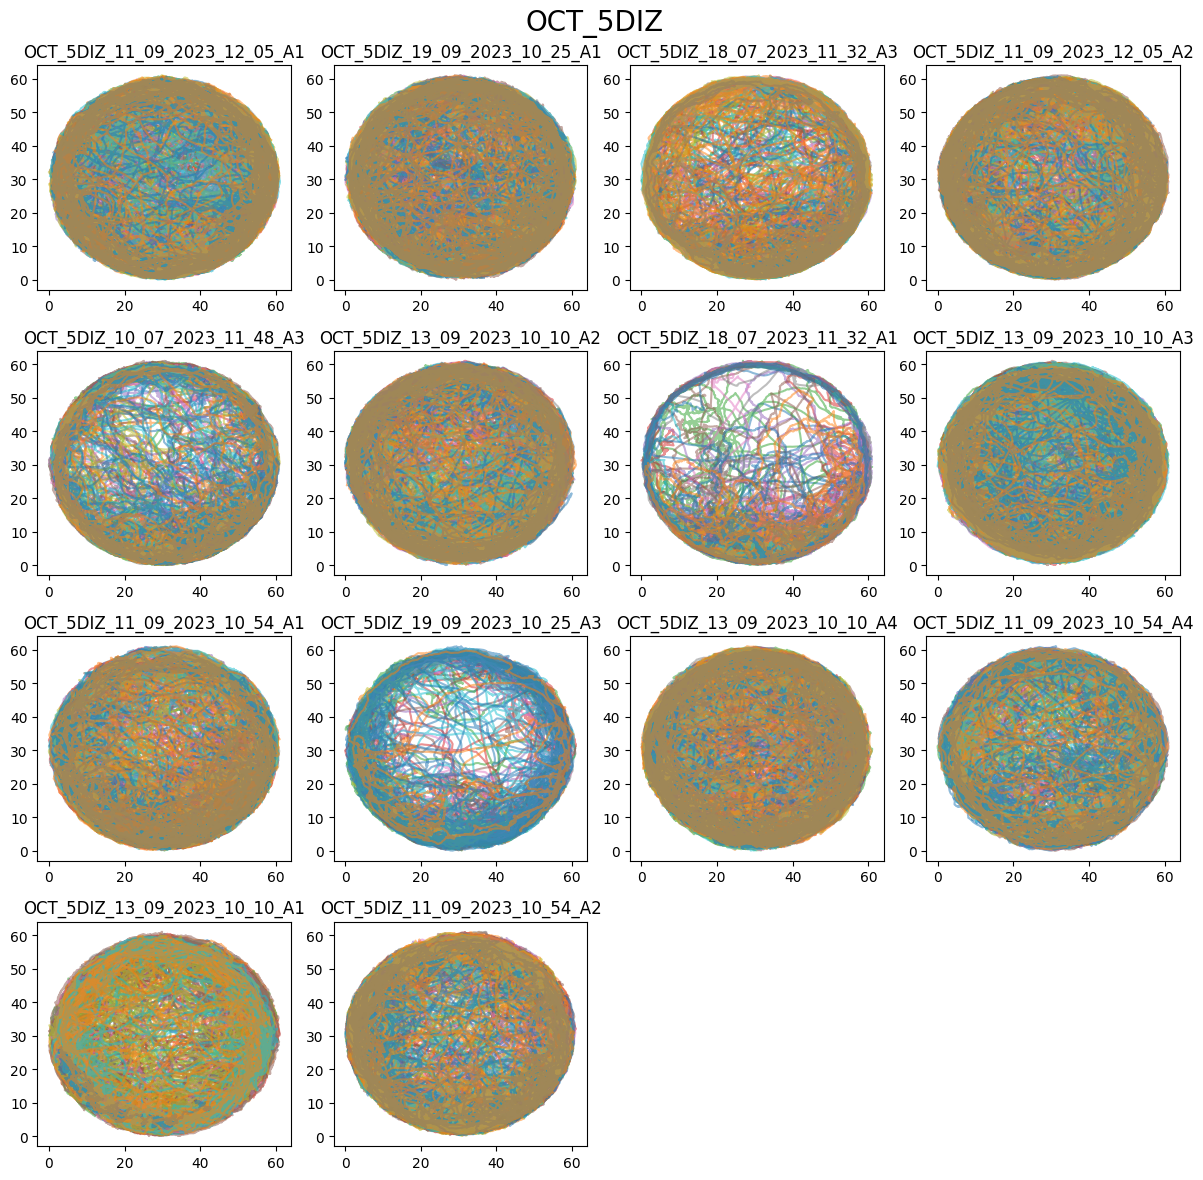

In [25]:
import os
import toml
import pandas as pd
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio

def plot_groups(treatment_path, treatment_name):
    treatment = fileio.load_multiple_folders(treatment_path)
    subplots_per_row = 4
    num_groups = len(treatment)
    num_rows = (num_groups + subplots_per_row - 1) // subplots_per_row
    fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, num_rows * 3))

    fig.suptitle(treatment_name, fontsize=20)
    for i, (group_name, group_path) in enumerate(treatment.items()):
        row_idx = i // subplots_per_row
        col_idx = i % subplots_per_row
        ax = axes[row_idx, col_idx]

        fly_dict = fileio.load_files_from_folder(group_path)
        ax.set_title(f'{group_name}')

        for fly_name, fly_path in fly_dict.items():
            fly_data = pd.read_csv(fly_path)
            ax.plot(fly_data['pos x'], fly_data['pos y'], alpha=0.5)

    for i in range(len(treatment), num_rows * subplots_per_row):
        row_idx = i // subplots_per_row
        col_idx = i % subplots_per_row
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()


CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)

for TREATMENT_NAME in config["TREATMENTS"]:
    INPUT_DIR = f"/home/milky/drosophila-SNA/data/processed/0_0_preproc_data/{TREATMENT_NAME}"
    plot_groups(INPUT_DIR, TREATMENT_NAME)